In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
t = np.linspace(0, 10, 1000)  # Time steps
data = np.sin(t) + 0.1 * np.random.randn(1000)  # Sine wave with noise


In [ ]:
data = (data - np.mean(data)) / np.std(data)  # Normalize the data
split = int(0.8 * len(data))  # Split data into training and testing
train_data, test_data = data[:split], data[split:]


In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []


    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(sequence)
        labels.append(label)

    return np.array(sequences), np.array(labels)

seq_length = 10  # Adjust this based on your data
train_sequences, train_labels = create_sequences(train_data, seq_length)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.fit(train_sequences, train_labels, epochs=50, batch_size=10)


Epoch 1/50
79/79 [==============================] - 2s 4ms/step - loss: 0.1686
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 5/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0285
Epoch 7/50
79/79 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 8/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 9/50
79/79 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 10/50
79/79 [==============================] - 1s 6ms/step - loss: 0.0303
Epoch 11/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 12/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0295
Epoch 13/50
79/79 [==============================

In [ ]:
test_sequences, test_labels = create_sequences(test_data, seq_length)
predictions = model.predict(test_sequences)


6/6 [==============================] - 0s 3ms/step


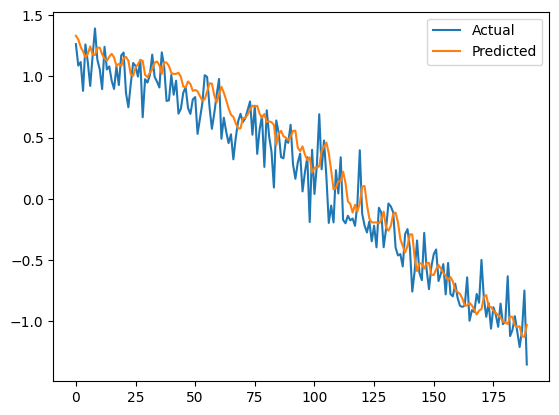

In [ ]:
plt.plot(test_labels, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
